In [39]:
# GENERATING THE DATA FOR CSV FILES
import numpy as np
from random import random
import random
from random import shuffle
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt
# Generates a list containing n-number of factors

#seed for consistent results
np.random.seed(0)
random.seed(0)

#creates the column headers for the factors
def populate_factors(n):
    s = 'Factor '
    f = [s+str(i) for i in range(1,n+1)]
    return f

# Randomly generates a list of sigma values (std deviations) corresponding to the number of factors between [0.1,0.3] 
def get_std_devs(factors):
    std_devs = []
    for i in factors:
        
        # Sampling from adding a normal and a uniform distribution to get the standard deviations for each factor
        # the sum of the normal and uniform was done to sample from a distribution that is uniform-like but has
        # potential for extreme values
        v = np.random.normal(0,.05,1) + np.random.uniform(0.1,0.25,1)
        std_devs.append(v)
    return std_devs

# This iterates over the factors to build covariance between factors as is seen in real-market factors
# Factors are are covariant with varrying numbers of other factors
def addCov(facts):
    df = pd.DataFrame(pct_changes).transpose()
    num_facts = len(facts)
    count = 0
    
    #this will be the list of shuffled indices so factors' covariances are not calculated in order
    indices = [i for i in range(0, num_facts)]
    shuffle(indices)
    
    #iterates over the factors adding covariance
    for j in indices:
        #chooses the number of factors to be covariant to
        num_cov = (int)((max(min(np.random.poisson(5,1) + np.random.normal(5, 10, 1),  num_facts -1), 0)) )
        if num_cov > 0:
            covs = (np.random.uniform(1,num_facts,num_cov))
            covs = [(int)(i) for i in covs]
#             print("Factor number " + str(j) + " is covariant with:\t" + str(covs))
            weight = 1 / num_cov

            #creates the covariance component of the series
            temp = df.iloc[:, j].copy()
            df.iloc[:, j] = df.iloc[:,j] * 0
            for i in covs:
                df.iloc[:, j] = df.iloc[:,j] + df.iloc[:,i] * weight

            df.iloc[:, j] = df.iloc[:,j] * 3 + temp
        count += 1


    return list(df.transpose().values)



    
    
        
    
# Samples from a normal distribution n-times to get the pct change for n-number of data points using the sigma values generated
def get_pct_changes(n,std_devs):
    p = []
    for dev in std_devs:
        # s is a list, so pct changes is a list of lists
        s = list(np.random.normal(0,dev,n))
        p.append(s)
        
    
    return p


# Calculates the returns on index based on time-units
def get_returns(pct_changes,numDataPoints):
    rets = []

    num_returns = numDataPoints
    i = 0
    tmp = 0
    factor_number = 0;
    while(i!=num_returns):
        summing = 0
        factor_number = 0
        for factor_change in pct_changes:
            factor_number+=1
            
            #each factor has slightly more influence on the returns
            tmp = max( 5*factor_number - 200,0 )
            
            #the weight of each factor is sampled from a uniform distribution
            w = np.random.uniform(0.1*tmp,1.4*tmp)
            
            #adds the weighted factor component
            summing+=w*factor_change[i]

        rets.append(summing)
        i+=1
    return rets



def add_jumps(pcts):
    
    for i in range(1,numFactors):
        pcts[i] += np.random.poisson(.1, numDataPoints) * np.random.normal(0, .1, numDataPoints)
        
    return pcts
        

numFactors=100
numDataPoints = 1000


factors = populate_factors(numFactors)
std_devs = get_std_devs(factors)
pct_changes = get_pct_changes(numDataPoints,std_devs)
pct_changes2 = addCov(pct_changes)
pct_changes3 = add_jumps(pct_changes2)
returns = get_returns(pct_changes2,numDataPoints)





print(max(returns))
print(min(returns))
print(sum(returns)/len(returns))



5075.369441613349
-6007.042159600406
-8.903182905940847


In [40]:
df = pd.DataFrame(pct_changes2).transpose()

In [41]:
# df.to_csv("/Users/christiancolomb/Desktop/Optimization-Factor-Selection-Project-master/percent_changes.csv")
df.to_csv("./percent_changes.csv")

In [42]:
df2 = pd.DataFrame(returns)

In [43]:

df2.to_csv("./returns.csv")

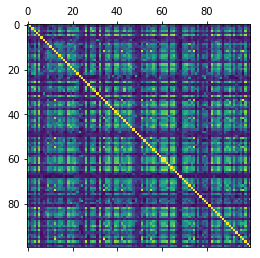

In [44]:
plt.matshow(df.corr())

In [45]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.190267,0.327892,0.590891,0.125432,0.747242,0.027809,0.058972,0.176983,0.485401,...,0.620225,0.210839,0.574727,0.154930,0.283584,0.568553,0.220805,0.672303,0.051544,0.277138
1,0.190267,1.000000,0.028200,0.073395,0.010454,0.176598,0.023279,-0.057447,-0.047819,0.032216,...,0.080031,-0.020613,0.069451,0.014619,0.201456,0.032300,-0.008775,0.140501,-0.006871,0.076457
2,0.327892,0.028200,1.000000,0.491249,0.221812,0.399537,0.032182,0.022324,-0.001369,0.187445,...,0.382773,0.266291,0.381537,0.009108,0.216388,0.247302,0.022685,0.446998,0.145556,0.054320
3,0.590891,0.073395,0.491249,1.000000,0.071260,0.768107,0.082308,0.113905,0.123177,0.425925,...,0.695355,0.319280,0.547008,0.136224,0.278133,0.443149,0.016242,0.800767,0.049467,0.278765
4,0.125432,0.010454,0.221812,0.071260,1.000000,0.138762,0.021540,-0.050830,-0.002595,0.022289,...,0.063058,-0.019695,0.154156,-0.011243,0.047459,0.146271,0.006367,0.150554,0.003281,0.039231
5,0.747242,0.176598,0.399537,0.768107,0.138762,1.000000,0.045737,0.102245,0.256551,0.637338,...,0.778129,0.240874,0.781804,0.241870,0.345538,0.695939,0.337618,0.858790,0.058552,0.377099
6,0.027809,0.023279,0.032182,0.082308,0.021540,0.045737,1.000000,-0.007971,-0.013456,-0.002848,...,0.088017,-0.006588,0.019763,-0.028706,-0.041925,-0.019398,-0.008800,0.054410,-0.002317,-0.017588
7,0.058972,-0.057447,0.022324,0.113905,-0.050830,0.102245,-0.007971,1.000000,-0.033194,0.116328,...,0.193954,0.025506,0.038487,0.116189,0.025611,0.016538,-0.015439,0.082678,0.041352,0.029890
8,0.176983,-0.047819,-0.001369,0.123177,-0.002595,0.256551,-0.013456,-0.033194,1.000000,0.142672,...,0.189466,-0.011780,0.105377,0.019956,0.016880,0.145204,-0.016372,0.211871,0.011443,0.011944
9,0.485401,0.032216,0.187445,0.425925,0.022289,0.637338,-0.002848,0.116328,0.142672,1.000000,...,0.383136,0.203691,0.447233,0.307521,0.322300,0.438558,0.344445,0.519022,0.014212,0.350772
